# Języki skryptowe w analizie danych - język R: webscraping z biblioteką `rvest` 
###### dr inż. Marcin Lawnik, mgr inż. Arkadiusz Banasik

**Wytyczne:**

Podobnie jak w przypadku biblioteki `Beautiful Soup` pobierz pracowników  [Katedry Zastosowań Matematyki i Metod Sztucznej Inteligencji](https://ms.polsl.pl/kzmimsi/index.php?id=pracownicy) i wyświetl zestawienie ilości profesorów, doktorów i magistrów. 

*Wskazówka:* Aby sprawdzić, czy w stringu występuje wzorzec można wykorzystać m.in. [https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/grep](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/grep)

**Uwaga**

Na Platformę Zdalnej Edukacji należy wysłać rozwiązanie zadania w postaci *ipynb* i *html*.

In [1]:
install.packages("rvest")
library(rvest)
ms <- html("https://ms.polsl.pl/kzmimsi/index.php?id=pracownicy")
ms

Installing package into 'C:/Users/Dawid/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rvest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dawid\AppData\Local\Temp\RtmpINHPSN\downloaded_packages


Loading required package: xml2

Warning message:
"'html' is deprecated.
Use 'xml2::read_html' instead.
See help("Deprecated")"


{html_document}
<html lang="pl">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\r\n\t<header><section><div class="container-fluid">\r\n\t\t\t\t<di ...

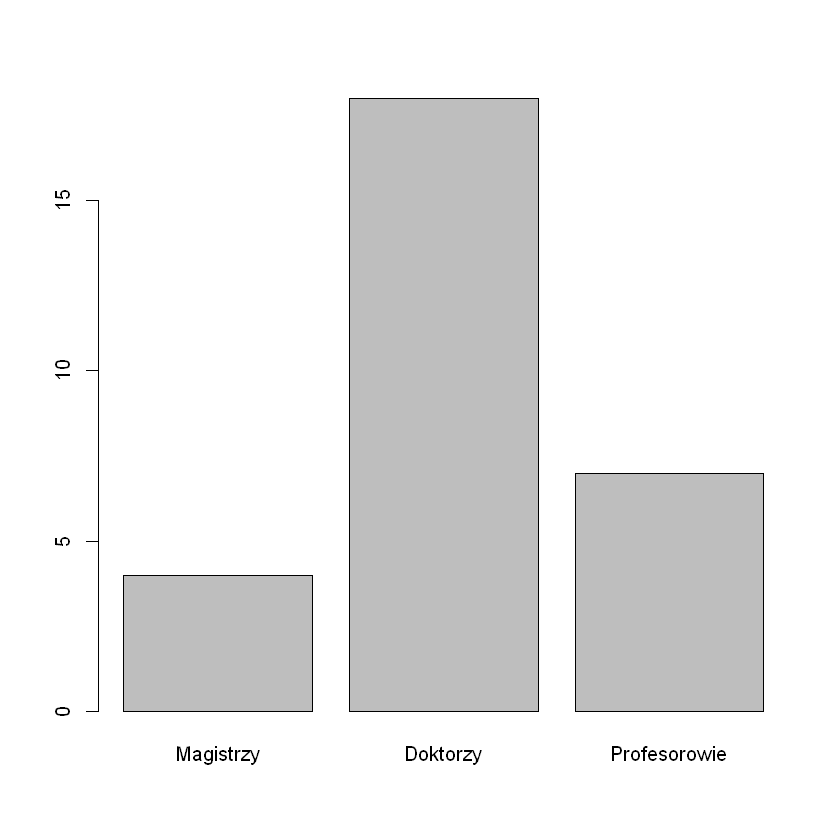

In [12]:
prof = 0
dr = 0
mgr = 0

for( prac in ms %>% html_nodes(".content a .pracownik strong") %>% html_text()){
    if(grepl('prof', prac, fixed = TRUE)){ 
        prof = prof + 1 
    }
    else if(grepl('dr', prac, fixed = TRUE)){ 
        dr = dr + 1 
    }
    else if(grepl('mgr', prac, fixed = TRUE)){  
        mgr = mgr + 1 
    }
}
plot = c(mgr, dr, prof)
labels = c("Magistrzy", "Doktorzy", "Profesorowie")
barplot(plot, names.arg=labels)